# projet Analyse de donnée
## MEBANG MBOUROUNOU AMINTA

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


## Contexte: 
        Cet ensemble de données comprend les transactions par carte de crédit dans l'ouest des États-Unis. Il comprend des informations sur chaque transaction, y compris les détails du client, le commerçant et la catégorie d'achat, et si la transaction était ou non une fraude.

  * 🗺️ Exploration: Quels types d'achats sont les plus susceptibles d'être des cas de fraude ? Considérez à la fois la catégorie de produit et le montant de la transaction.
  
  * 📊 Visualisation: Utilisez un tracé géospatial pour visualiser les taux de fraude dans différents états.
  
  * 🔎 Analyse : Les clients âgés sont-ils significativement plus susceptibles d'être victimes de fraude à la carte bancaire ?
 
  *  commençons l'analyse !


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# chargement des données :

les données sont dans un fichier csv

In [24]:
fifa= pd.read_csv("data/FIFA.csv")


In [25]:
fifa.tail(15)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
41,CANADA,MOROCCO,52%,36%,12%,1,2,01 DEC 2022,16 : 00,Group F,...,0,0,7,7,0,1,66,72,224,324
42,JAPAN,SPAIN,14%,78%,8%,2,1,01 DEC 2022,20 : 00,Group E,...,0,0,14,6,0,0,85,49,637,150
43,COSTA RICA,GERMANY,27%,60%,13%,2,4,01 DEC 2022,20 : 00,Group E,...,0,0,32,8,0,0,79,77,378,230
44,GHANA,URUGUAY,46%,39%,15%,0,2,02 DEC 2022,16 : 00,Group H,...,0,0,12,9,0,0,92,84,248,293
45,KOREA REPUBLIC,PORTUGAL,34%,55%,11%,2,1,02 DEC 2022,16 : 00,Group H,...,0,0,14,12,0,0,54,50,359,233
46,SERBIA,SWITZERLAND,45%,41%,14%,2,3,02 DEC 2022,20 : 00,Group G,...,0,0,14,10,0,0,74,82,276,253
47,CAMEROON,BRAZIL,31%,56%,13%,1,0,02 DEC 2022,20 : 00,Group G,...,0,0,20,7,0,0,78,54,321,226
48,NETHERLANDS,UNITED STATES,33%,54%,13%,3,1,03 DEC 2022,16 : 00,Round of 16,...,0,0,18,13,0,0,101,77,325,256
49,ARGENTINA,AUSTRALIA,53%,35%,12%,2,1,03 DEC 2022,20 : 00,Round of 16,...,0,0,5,14,1,0,67,73,240,453
50,FRANCE,POLAND,48%,42%,10%,3,1,04 DEC 2022,16 : 00,Round of 16,...,0,1,11,16,0,0,71,64,220,297


In [33]:
fifa.shape

(56, 88)

In [27]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  56 non-null     object
 1   team2                                                  56 non-null     object
 2   possession team1                                       56 non-null     object
 3   possession team2                                       56 non-null     object
 4   possession in contest                                  56 non-null     object
 5   number of goals team1                                  56 non-null     int64 
 6   number of goals team2                                  56 non-null     int64 
 7   date                                                   56 non-null     object
 8   hour                                                   56 non-

## Question/Context 
quel est la meilleure équipe de ce tournoi ?

* pour répondre à cette question nous allons tout d'abord concerver les colones importante 
* supprimer les colonnes inutiles comme "possession in contest" , "date",	"hour", "forced turnovers team1",	"forced turnovers team2"
* regrouper les equipes selon leur category 
* fusinner les données flous

In [31]:
fifa_good= fifa.drop(columns=['possession in contest','date','hour','forced turnovers team1','forced turnovers team2'])

In [32]:
fifa_good

,team1,team2,possession team1,possession team2,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,conceded team1,...,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,0,2,Group A,5,6,2,...,19,17,0,1,6,5,0,0,256,279
1,ENGLAND,IRAN,72%,19%,6,2,Group B,13,8,2,...,16,10,0,1,8,13,0,0,139,416
2,SENEGAL,NETHERLANDS,44%,45%,0,2,Group A,14,9,2,...,14,14,0,0,9,15,0,0,263,251
3,UNITED STATES,WALES,51%,39%,1,1,Group B,6,7,1,...,11,15,0,1,7,7,0,0,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,1,2,Group C,14,3,2,...,22,16,1,0,4,14,0,0,163,361
5,DENMARK,TUNISIA,55%,33%,0,0,Group D,11,11,0,...,11,10,0,0,11,11,0,0,226,287
6,MEXICO,POLAND,54%,31%,0,0,Group C,13,8,0,...,16,16,0,0,8,15,0,0,193,290
7,FRANCE,AUSTRALIA,56%,35%,4,1,Group D,22,4,1,...,11,5,0,0,4,22,0,0,250,316
8,MOROCCO,CROATIA,32%,57%,0,0,Group F,8,6,0,...,12,17,0,0,7,8,0,0,391,217
9,GERMANY,JAPAN,65%,22%,1,2,Group E,25,10,2,...,17,10,1,0,12,26,0,0,164,487


In [34]:
fifa_good = fifa_good.dropna(axis=0)

In [40]:
fifa_group= fifa_good.groupby(['category'])
print(fifa_group)

In [29]:
fraude = df.groupby(['category']).count()['is_fraud']
fraude

category
entertainment      72
food_dining        71
gas_transport     168
grocery_net        54
grocery_pos       145
health_fitness     85
home              128
kids_pets         109
misc_net           73
misc_pos           83
personal_care      99
shopping_net      105
shopping_pos      114
travel             27
Name: is_fraud, dtype: int64

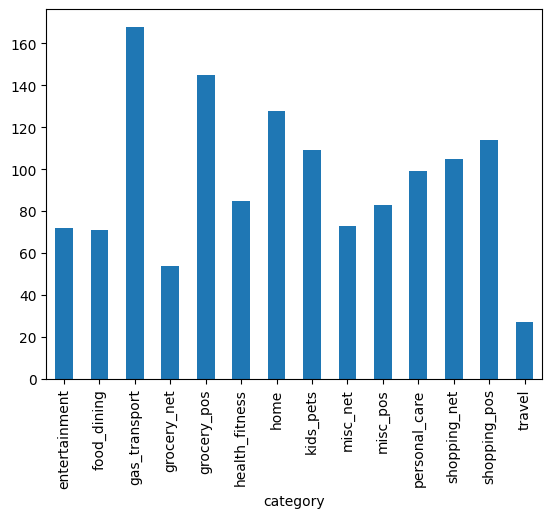

In [37]:
import matplotlib.pyplot as plt
fraude.plot(kind='bar');